In [33]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### FRBs and Pulses from an Observational Point of View

As yet we do not know the physcial mechanism which creates the observed fast radio bursts (FRBs) that were first reported in [Lorimer et al 2007](http://adsabs.harvard.edu/abs/2007Sci...318..777L) and continue to be [catalogued](https://astronomy.swin.edu.au/pulsar/frbcat/). This notebook is intended as a guide for how FRBs appear from an observational point of view, and foundation for how we typically search for them.

From an observer's point of view FRBs are wide-band, bright, narrow-width, quadratic chirps. To break down these adjectives from the radio astronomy prospective:

* Wide-band: when detected around 1.4 GHz (L-band) the chirp continues beyond the observational bandwidth, which can be up to a few hundred MHz.
* Bright: astronomical radio sources are very weak compared to terrestrial radio sources. But, FRBs are very bright compared to astronomical sources (covering a wide range 0.1-100 Jy).
* Narrow-width: these bright bursts typically only last a few milliseconds, assuming the pulse is 'dedispered' which bring us to the last point.
* Quadratic chirps: the burst appears as a whistle, the high frequency part of the burst arrives before the low frequency end. It is this effect that was central to the first, serendipidous detection of an FRB, and continues to be exploited.

### Chirp Functions

To begin with we can construct a simple model of an FRB based on quadratic chirp function:

$$f(t_1, t_0) = f_0(t_0) + k (t_1-t_0)^2 = f_0 + k \Delta t^2$$

where $f(t_0, t_1)$ is the instantaneous frequency at time $t_1$ based on the initial frequency $f_0$ at the initial time $t_0$ dependent on the ***chirpyness*** factor $k$. For simplicity $t_0$ is usually defined as $t_0=0$, and $f_0 = f_0(0)$

$$f(\Delta t) = f_0 + k \Delta t^2$$

Re-arranging the equation above we can solve for $k$:

$$k = \frac{f(\Delta t) - f_0}{\Delta t^2}$$

That is, if we want a chirp function which starts at $f_0$ and ends after a length of time $\Delta t$ at frequency $f(\Delta t)$ then we can use this function to compute $k$. This is related to the ***dispersion measure*** (DM) commonly used in radio astronomy, we will come back to this later. For now lets plot a few examples to see what this function looks like.

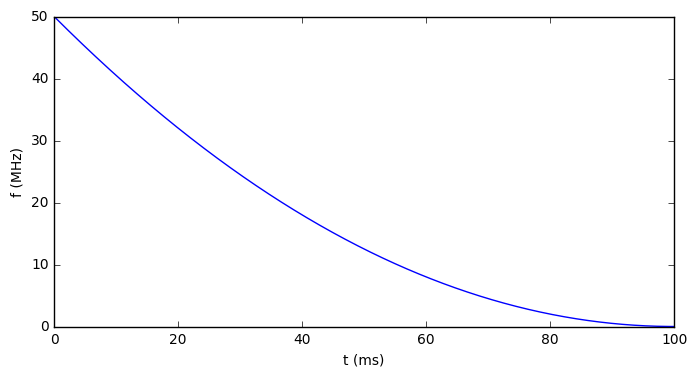

In [88]:
def quadChirp(f1, f0, t1, t0=0.):
    """Returns a quadratic chirp function
    f1: float, ending frequency (MHz)
    f0: float, starting frequency (MHz)
    t1: float, end time of pulse (milliseconds)
    t0: float, start time of pulse (milliseconds)
    """
    kk = (f1 - f0) / ((t1 - t0)**2.)
    return lambda t: f0 + kk * ((t1 - t)**2.)

f1 = 1400.
f0 = 1200.
t1 = 100.
chirpFunc = quadChirp(f1, f0, t1)
ts = np.linspace(0, 100, 1024)
freqs = chirpFunc(ts)

fig, axes = plt.subplots(figsize=(8,4))
plt.plot(ts, freqs)
plt.xlabel('t (ms)')
plt.ylabel('f (MHz)')
plt.title('Quadratic Chirp Function')

In the frequency domain the chirp is concave. At high frequency the time differen between two frequencies is shorter than the difference between two frequencies at the lower end of the band. We can also look at the chirp waveform in the time domain. A generic chirpped waveform is defined as:

$$x(t) = \sin(\phi(t))$$

where $\phi(t)$ is the time-dependent phase function, the derivative of which is equal to the angular frequency $\phi'(t) = 2\pi f(t)$, for a quadratic chirp the phase function is:

$$\phi(t) = \phi_0 + 2 \pi \int_{0}^{t} f(\tau) d\tau = \phi_0 + 2 \pi \int_{0}^{t} f_o + k\tau^2 d\tau = \phi_0 + 2 \pi (f_0t + \frac{kt^3}{3})$$

thus the waveform of a quadratic chirp is:

$$x(t) = \sin(\phi_0 + 2 \pi(f_0t + \frac{kt^3}{3}))$$

for simplicity the initial phase $\phi_0$ is defined as $\phi_0 = 0$

$$x(t) = \sin \left(2 \pi \left(f_0t + \frac{kt^3}{3} \right) \right)$$

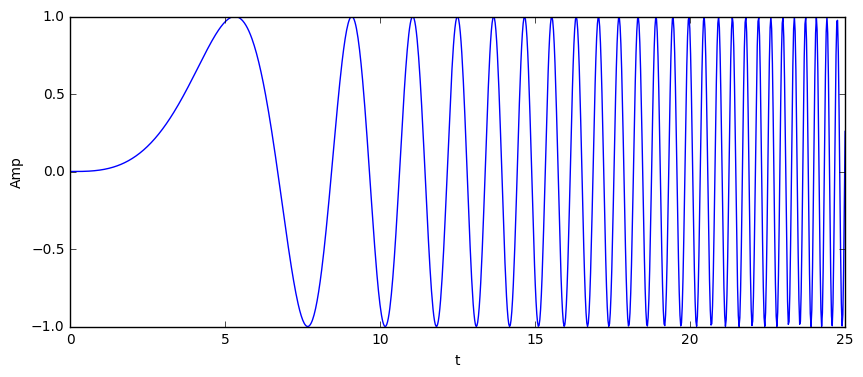

In [91]:
def quadChirpWaveform(f1, f0, t1, t0=0.):
    """Returns a quadratic chirp waveform function
    f1: float, ending frequency (MHz)
    f0: float, starting frequency (MHz)
    t1: float, end time of pulse (milliseconds)
    t0: float, start time of pulse (milliseconds)
    """
    kk = (f1 - f0) / ((t1 - t0)**2.)
    return lambda t: np.sin(2. * np.pi * (f0*t + ((kk * t**3.)/3.)))

#print quadChirpWaveform(f1, f0, t1)(ts)

fig, axes = plt.subplots(figsize=(10,4))
ts = np.linspace(0, 25, 1024)
plt.plot(ts, quadChirpWaveform(50, 0, t1)(ts))
plt.title
plt.xlabel('t')
plt.ylabel('Amp')
plt.title('Quadratic Chirp Waveform')

### Pulse Width

The chirp function represents a pure tone sweeping through a range of frequencies over a fixed time length. Astrophysical objectslikepulsars and FRBs have some profile width, which to first approximation is a Gaussian distribution of flux.

### Linear Chirp Function

A chirp functiont hat varies linearly with time is defined as:

$$f(\Delta t) = f_0 + k \Delta t$$

with a corresponding waveform function:

$$x(t) = \sin \left(2 \pi \left(f_0t + \frac{kt^2}{2}\right)\right)$$

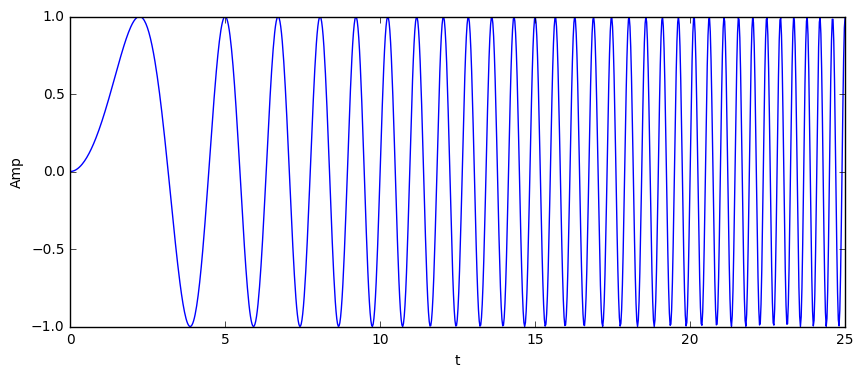

In [84]:
def linearChirp(f1, f0, t1, t0=0.):
    """Returns a linear chirp function
    f1: float, ending frequency (MHz)
    f0: float, starting frequency (MHz)
    t1: float, end time of pulse (milliseconds)
    t0: float, start time of pulse (milliseconds)
    """
    kk = (f1 - f0) / ((t1 - t0))
    return lambda t: f0 + kk * (t1 - t)

def linearChirpWaveform(f1, f0, t1, t0=0.):
    """Returns a linear chirp waveform function
    f1: float, ending frequency (MHz)
    f0: float, starting frequency (MHz)
    t1: float, end time of pulse (milliseconds)
    t0: float, start time of pulse (milliseconds)
    """
    kk = (f1 - f0) / ((t1 - t0))
    return lambda t: np.sin(2. * np.pi * (f0*t + ((kk * t**2.)/2.)))

f1 = 1400.
f0 = 1200.
t1 = 100.
chirpFunc = linearChirp(f1, f0, t1)
ts = np.linspace(0, 100, 1024)
freqs = chirpFunc(ts)

#fig, axes = plt.subplots(figsize=(8,4))
#plt.plot(ts, freqs)
#plt.xlabel('t (ms)')
#plt.ylabel('f (MHz)')
#plt.title('Linear Chirp Function')

fig, axes = plt.subplots(figsize=(10,4))
ts = np.linspace(0, 25, 1024)
plt.plot(ts, linearChirpWaveform(10, 0, t1)(ts))
plt.xlabel('t')
plt.ylabel('Amp')
plt.title('Linear Chirp Waveform')

### Exponential Chirp Function

A chirp functiont hat varies linearly with time is defined as:

$$f(\Delta t) = f_0 k^{\Delta t}$$

with a corresponding waveform function:

$$x(t) = \sin \left(2 \pi \left(f_0 \frac{k^t-1}{\ln k} \right) \right)$$

1.00154269553


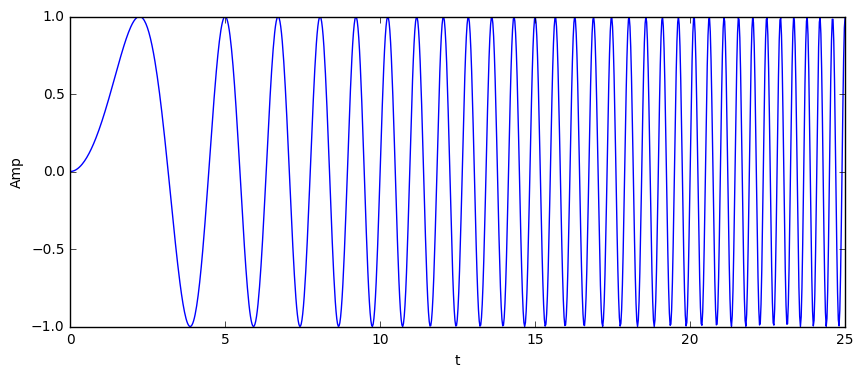

In [104]:
def expChirp(f1, f0, t1, t0=0.):
    """Returns an exponential chirp function
    f1: float, ending frequency (MHz)
    f0: float, starting frequency (MHz)
    t1: float, end time of pulse (milliseconds)
    t0: float, start time of pulse (milliseconds)
    """
    kk = (f1/f0)**(1./(t1-t0))
    print kk
    return lambda t: f0 + kk**(t1 - t)

def expChirpWaveform(f1, f0, t1, t0=0.):
    """Returns an exponential chirp waveform function
    f1: float, ending frequency (MHz)
    f0: float, starting frequency (MHz)
    t1: float, end time of pulse (milliseconds)
    t0: float, start time of pulse (milliseconds)
    """
    kk = (f1/f0)**(1./(t1-t0))
    return lambda t: np.sin(2. * np.pi * (f0 * (kk**(t1 - t) - 1.)/(np.log(kk))))

f1 = 1400.
f0 = 1200.
t1 = 100.
chirpFunc = expChirp(f1, f0, t1)
ts = np.linspace(0, 1000, 1024)
freqs = chirpFunc(ts)

#fig, axes = plt.subplots(figsize=(8,4))
#plt.plot(ts, freqs)
#plt.xlabel('t (ms)')
#plt.ylabel('f (MHz)')
#plt.title('Exponential Chirp Function')

fig, axes = plt.subplots(figsize=(10,4))
ts = np.linspace(0, 25, 1024)
plt.plot(ts, linearChirpWaveform(10, 0, t1)(ts))
plt.xlabel('t')
plt.ylabel('Amp')
plt.title('Exponential Chirp Waveform')

#### A radio astronomy digression:

The chirpyness $k$ is related to the ***dispersion measure*** (DM) commonly used in radio astronomy and is related to the effect of the interstellar medium (ISM) seen in pulses from pulsars. The relation to the generic chirpyness factor $k$ is

### Outline

* chirp signal:
    * time domian representation
    * adding gaussian width, Fourier relation
* despersion:
    * ISM
    * direction-dependence
    * pulsar catalogue: example pulses
* dedispersion:
    * equation and code: coherent and incoherent
    * freq-collapse and detect
    * DM-time space
    * FRB examples
* implied distances

* https://en.wikipedia.org/wiki/Chirp
* https://uk.mathworks.com/help/signal/ref/chirp.html
* http://www.gaussianwaves.com/2014/07/chirp-signal-frequency-sweeping-fft-and-power-spectral-density/